In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# Table of content (TOC) <a name="toc">

1. [Load data](#load-data)
2. [Missing data visualisation](#missing_data_visualization)
2. [Correlation](#correlation)
3. [Data visualization analysis](#data_visualization_analysis)

# Load data

In [2]:
data = pd.read_csv("../avatars_echOvid_train_X.csv")

In [3]:
data.shape

(262, 39)

Our dataset has 262 patients and 39 measurements.

In [4]:
data.head(5)

,id,Nom du centre,age,Sexe,Lieu de provenance du patient,Echographiste,Tabagisme actif,BPCO,Asthme,Autre antecedent respiratoire,...,Zone anterieure droite haut,Zone anterieure droite bas,Zone anterieure gauche haut,Zone anterieure gauche bas,Zone posterieure droite haut,Zone posterieure droite bas,Zone posterieure gauche haut,Zone posterieure gauche bas,Oxygenotherapie,Outcome J28
0,1,Paris-APHP - Cochin,91,Masculin,Domicile,Forme pour l'epidemie,Non,Non,Non,Non,...,Stade 2,Stade 2,Stade 1,Stade 2,Stade 2,Stade 2,Stade 2,Stade 2,NaN,Death
1,109,Paris-APHP - Hotel Dieu,45,Feminin,Domicile,Experience d'echographie,Non,Non,Non,Non,...,Stade 0,Stade 1,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Moderee,Back home
2,46,Melun - CH Marc Jacquet,76,Feminin,EHPAD,Experience d'echographie,Non,Non,Non,Non,...,Stade 0,Stade 1,Stade 1,Stade 0,Stade 1,Stade 2,Stade 1,Stade 2,Assistance respiratoire,Hospitalization
3,247,Paris-APHP - Hotel Dieu,55,Feminin,Hopital,Experience d'echographie,Oui,Non,Non,Non,...,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,NaN,Back home
4,195,Paris-APHP - Hotel Dieu,42,Feminin,Domicile,Experience d'echographie,Non,Non,Non,Non,...,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,Stade 0,NaN,Back home


Remove comments of variables for better visualization

In [5]:
data.rename(columns={"AINS au long cours (dans le cadre d'une pathologie suivie)": "AINS au long cours",
                     "AINS ponctuel recent (cadre des symptomatologies COVID-19 suspect avere)": "AINS ponctuel recent",
                     'Tension arterielle systolique (mmHg)' : 'Systolique',
                     'Tension arterielle diastolique (mmHg)': 'Diastolique',
                     'Frequence cardiaque (puls. min)' : 'Frequence cardiaque',
                     'Frequence respiratoire (resp. min)': 'Frequence respiratoire',
                     'Temperature (Celsius)': 'Temperature'
                     },
                     inplace = True)

# Missing data vizualisation

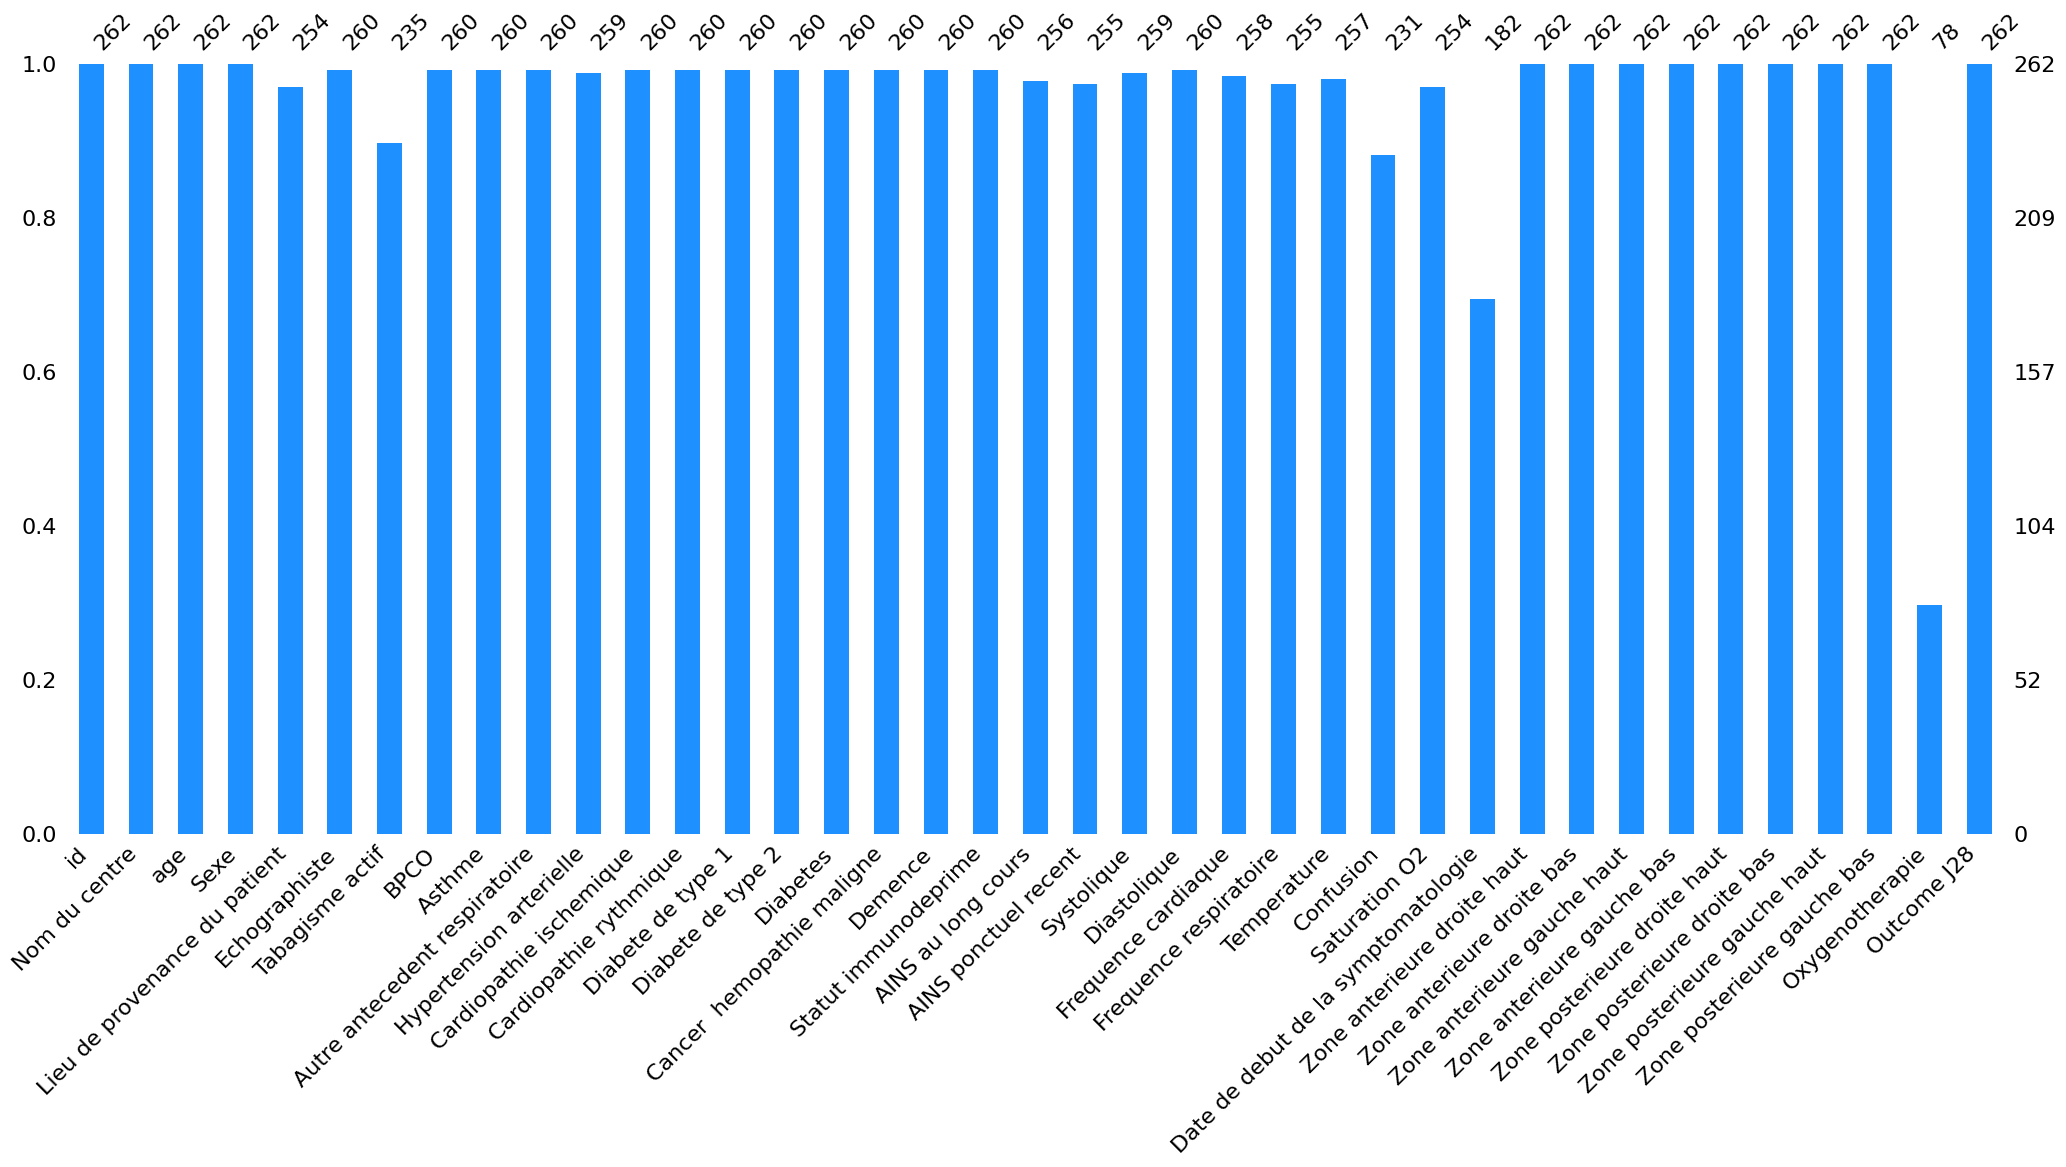

In [6]:
msno.bar(data, color="dodgerblue")
plt.show()

We want to see the proportion of missing values to see how we can handle them (delete, imputation or other). 

We have an important rate of missingness for the Oxygenotherapie so we cannot chose to get rid of them otherwise we will lose more than the half of our input.

For numerical values, as diastolique, systolique, heart rate, temperature, we decide to do data imputation by using KNN approach.

# Correlation

Lets see how some variables are correlated or have impact on each others. For this purpose we will use **kendall coefficent tau**.

The *kendall coefficient* represents the degree of concordance between two columns of ranked data.

*kandall's tau* = 
$$
x = \frac{C-D}{C+D}         ∊ [-1, 1]
$$
                                                            C = number of concordant pairs
                                                            D = number of discordant pairs

**This formula means that :**


|  tau coeff. | interpretation |
| --- | --- |
| Below 0 |	    more discordance than concordance |
| 0 – 0.2 |	weak concordance |
| 0.2 – 0.5 |	moderate concordance |
| 0.5 and Above | 	strong concordance |

In [7]:
def get_positive_correlations(df, inf, sup):
    """
    Print correlatation of two variables between bounds.
    Args:
        df (dataframe): dataframe containing our data.
        inf(float): lower bound 
        sup(float): upper bound (not included)
    """
    
    for x in range(df.shape[0]):
        for y in range(x, df.shape[1]):
            if df.iloc[x, y] < sup and df.iloc[x, y] >= inf:
                print(round(df.iloc[x, y], 2), df.columns[x], df.index[y])

There is no correlation more than 0.5 so we will focus on moderate correlation.

In [8]:
for i in np.arange(0.5, 0.2, -0.2):
    print("\nFROM ", round(i, 1), " TO ", round(i - 0.1, 1),  "\n")
    get_positive_correlations(data.corr(method='kendall'), i - 0.1, i)


FROM  0.5  TO  0.4 

0.45 Systolique Diastolique

FROM  0.3  TO  0.2 

0.26 age Frequence respiratoire
0.21 Frequence cardiaque Frequence respiratoire
0.23 Frequence cardiaque Temperature
0.25 Frequence respiratoire Temperature


These results confirm our expetations, it is obvious that:

**Systolique Diastolique** more the systolic blood pressure is important more the diastolic blood pressure inscreases.

**age Frequence respiratoire** more the patient is old more he will have difficulty breathing.

**Frequence cardiaque Frequence respiratoire** they have an impact on each other.

**Frequence cardiaque Temperature** more the patient is feverish more the heart rate increases.

**Frequence respiratoire Temperature** more the patient is feverish more the respiratory rate increases.

# Data vizualisation

Now we will visualize our dataset to see the proportion of patients concerned by each features. For this we will use donut representation.

In [9]:
def donut_show(column_name):
    plt.gca().axis("equal")
    values = data[data[column_name].notna()][column_name].value_counts()
    labels = values.index
    pie = plt.pie(values, startangle=0, autopct='%0.1f%%', pctdistance=0.9, radius=0.9, labels=labels, labeldistance=1.2)
    plt.title(column_name, size=20, fontname="Times New Roman", fontweight="bold")
    plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
    plt.gca().add_artist(plt.Circle((0,0), 0.5, color='white'))
    plt.show()
    plt.close()

# Center name

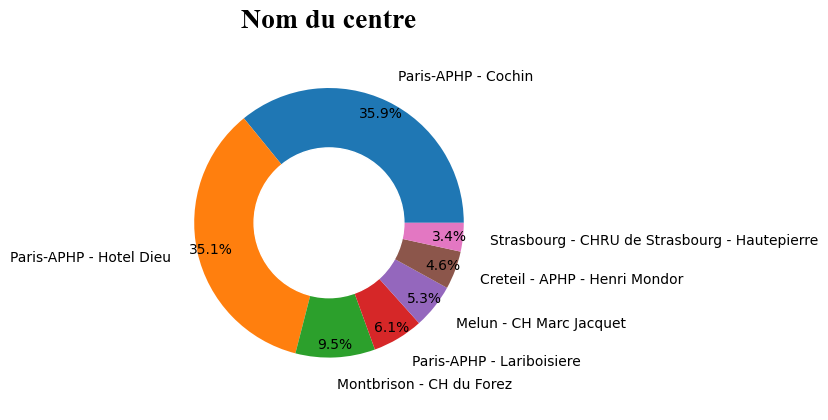

In [10]:
donut_show('Nom du centre')

Most of our data are from Paris-APHP - Hotel Dieu and less from Strasbourg CHRU de Strasbourg - Hautepierre

# Age

Its was not possible to properly visalize age proportion by just use each of them. So we group them by age range of 10.

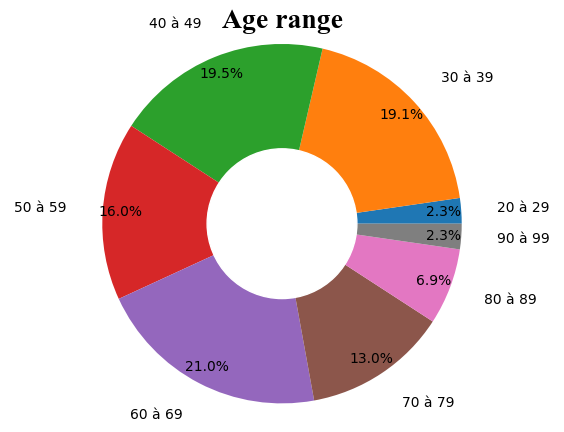

In [11]:
# Group data by age range of 10
ages = []
ages_index = []
for age in range(20, 100, 10):
    upper = age + 10
    ages_index.append(f'{age} à {upper - 1}')
    ages.append(len(data[(age <= data.age) & (data.age < upper)]))
age = pd.DataFrame(ages, index=ages_index, columns=['range'])

plt.gca().axis("equal")
pie = plt.pie(age.range, startangle=0, autopct='%0.1f%%', pctdistance=0.9, radius=1.2, labels=ages_index, labeldistance=1.2)
labels=age.index.unique()
plt.title('Age range', size=20, fontname="Times New Roman", fontweight="bold")
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.gca().add_artist(plt.Circle((0,0), 0.5, color='white'))
plt.show()
plt.close()

The age representation is almost balanced. We have a large proportion of patients between 30 and 79 years.

# Sex

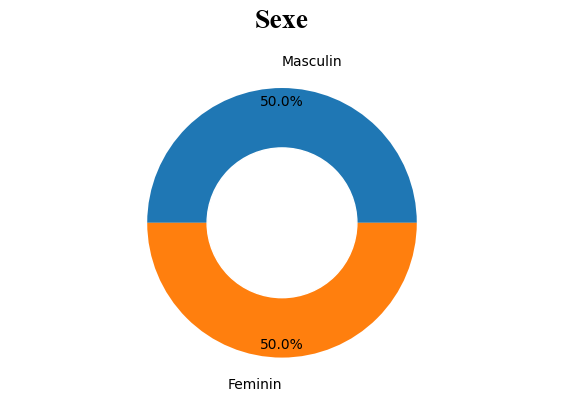

In [12]:
donut_show("Sexe")

We have same number of female and male.

# Patient’s Place of Origin

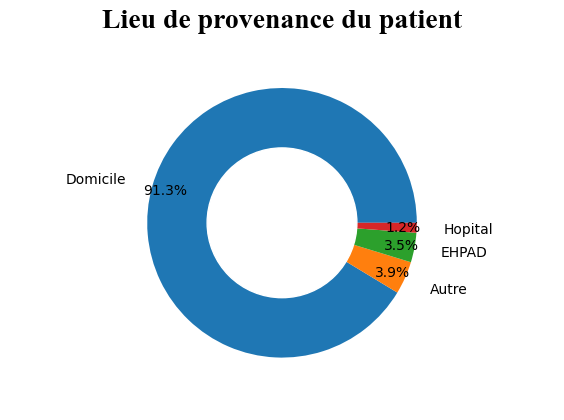

In [13]:
donut_show("Lieu de provenance du patient")

Contrary to what one might think more patients came from home instead of EHPAD.

# Echographer

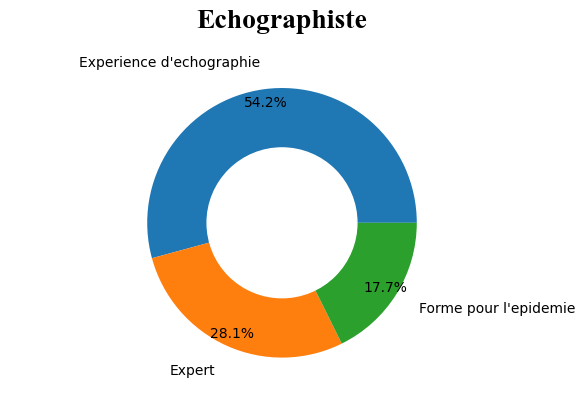

In [14]:
donut_show("Echographiste")

There is still 17.7% people who had to be trained for the epidemic.

# Tabagisme actif

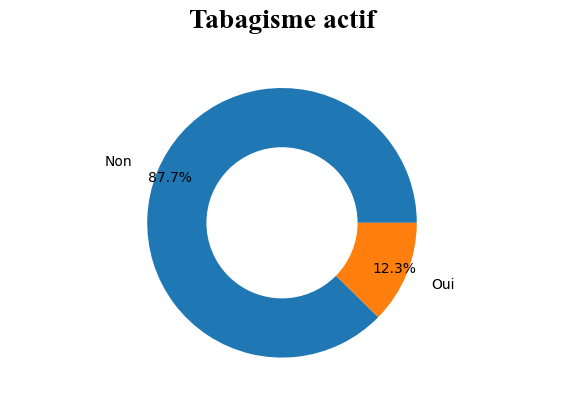

In [15]:
donut_show("Tabagisme actif")

Almost 90% of patients are non smokers. We also see with the correlation that, being smoker or not has no effect on how the disease got you.

# COPD

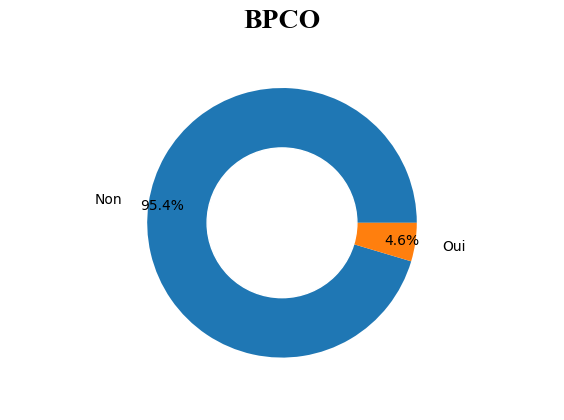

In [16]:
donut_show("BPCO")

Just 4.6% of patients have COPD that can mean that it has no effect on making the disease.

# Asthma

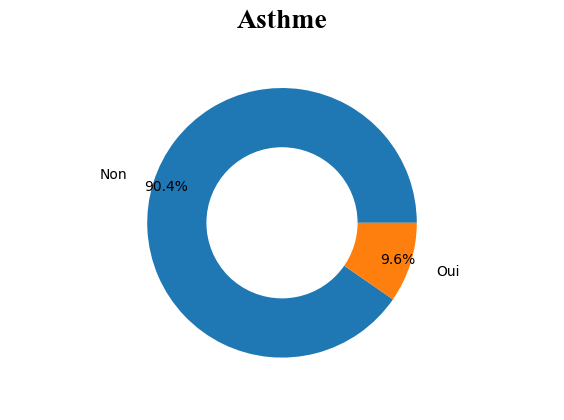

In [17]:
donut_show("Asthme")

9.6% are asthmatic 

# Other history of breathing

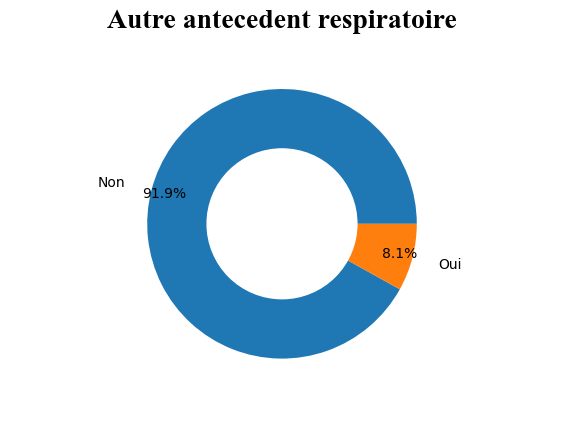

In [18]:
donut_show("Autre antecedent respiratoire")

With this, we can say that it is not because we don't have history breathing that we cannot have the disease.

# Hypertension

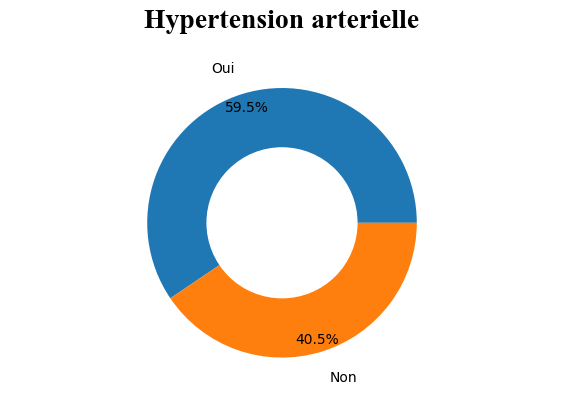

In [19]:
donut_show("Hypertension arterielle")

There is 59.5% that are hypertensive We can believe that have high blood pressure have impact on people

# Ischemic heart disease

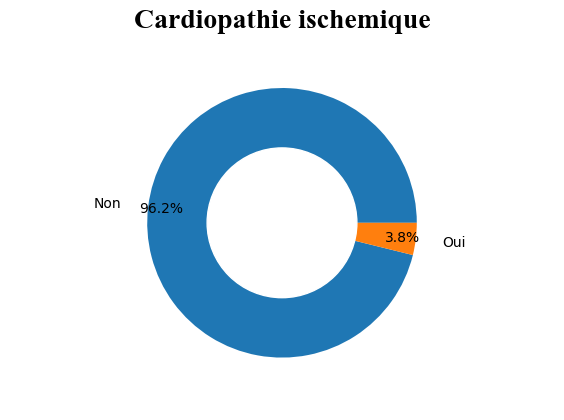

In [20]:
donut_show("Cardiopathie ischemique")

# Rhythmic heart disease

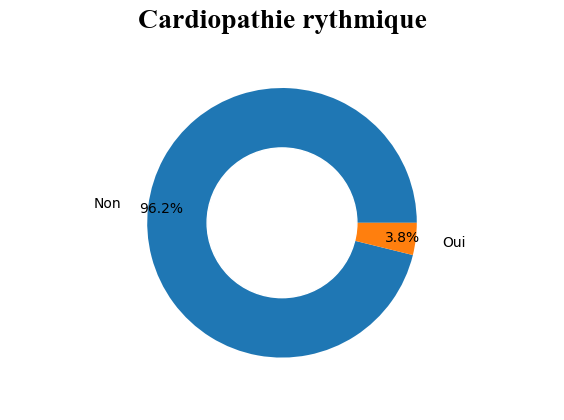

In [21]:
donut_show("Cardiopathie rythmique")

# Type 1 Diabetes

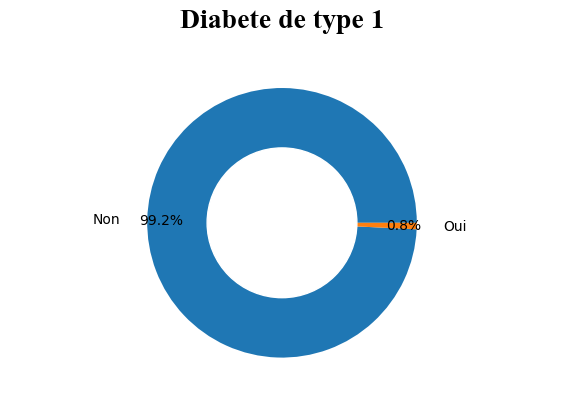

In [22]:
donut_show('Diabete de type 1')

There’s a tiny part of persons with type 1 diabetes, so we can say that it has no effect.

# Type 2 diabetes

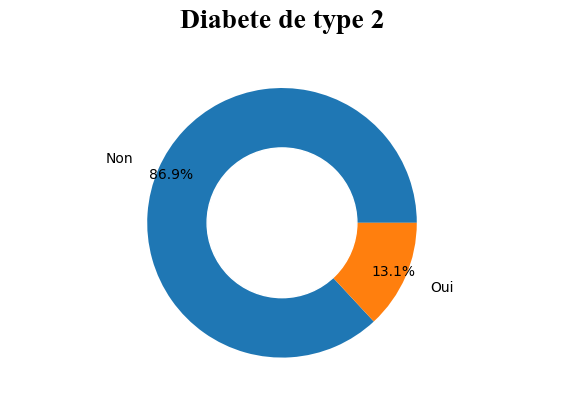

In [23]:
donut_show('Diabete de type 2')

# Diabetes

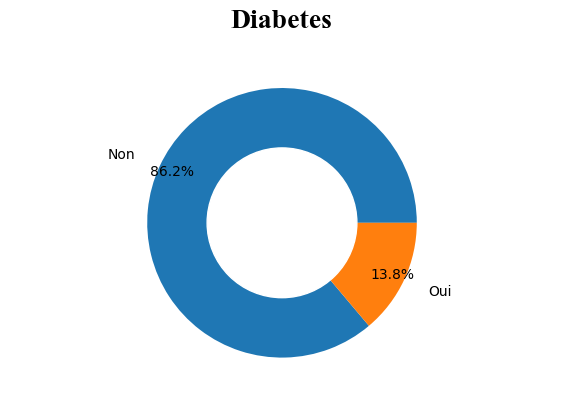

In [24]:
donut_show('Diabetes')

# Dementia

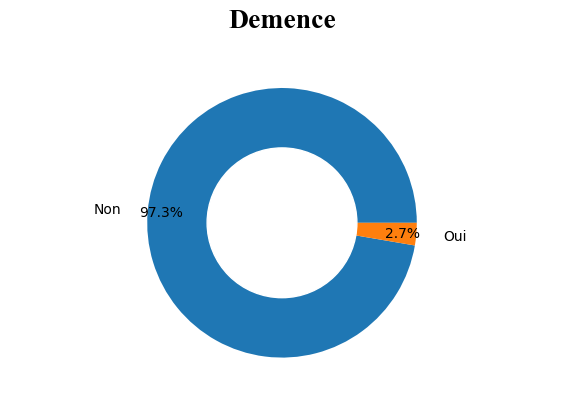

In [25]:
donut_show('Demence')

# Immunodeficiency status

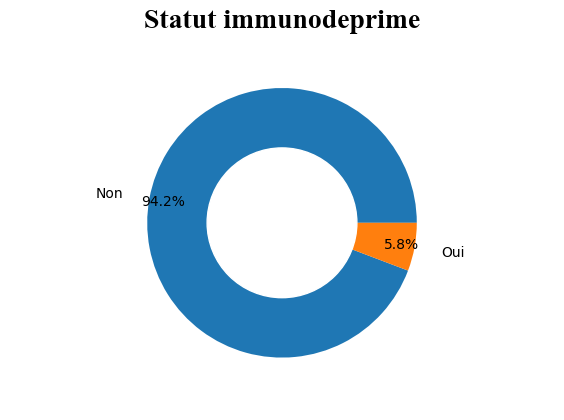

In [26]:
donut_show('Statut immunodeprime')

# Long term NSAIDs

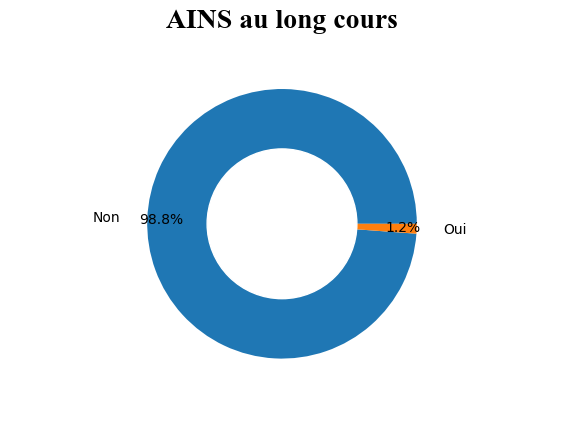

In [27]:
donut_show('AINS au long cours')

# One-time NSAIDs recent

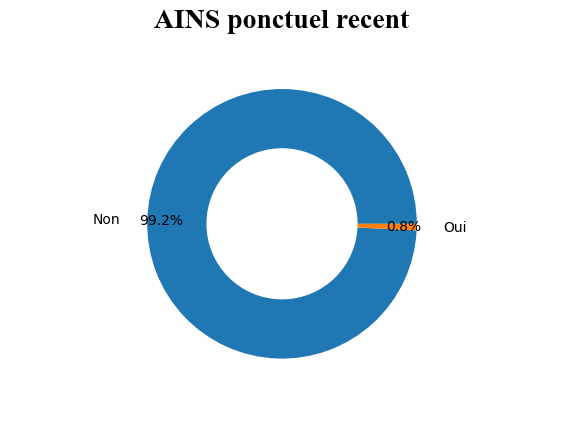

In [28]:
donut_show('AINS ponctuel recent')

# Malignant hemopathic cancer

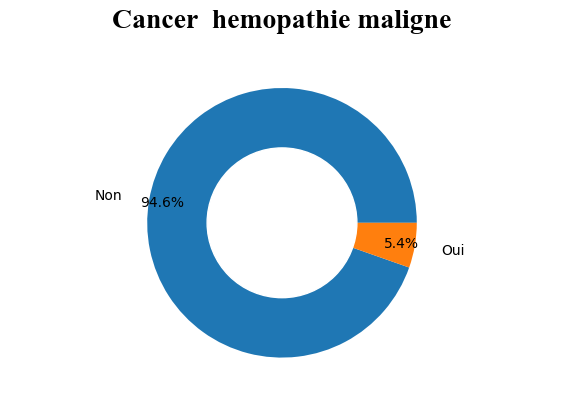

In [29]:
donut_show('Cancer  hemopathie maligne')

It's obsvious that our model will have bias problem.

There is a big proportion of people who went back home

# Confusion


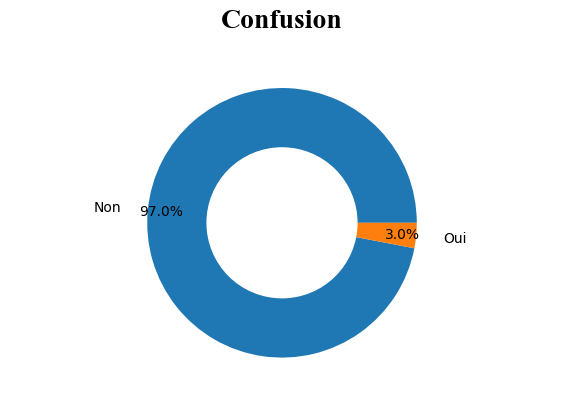

In [30]:
donut_show('Confusion')

# Upper right anterior area

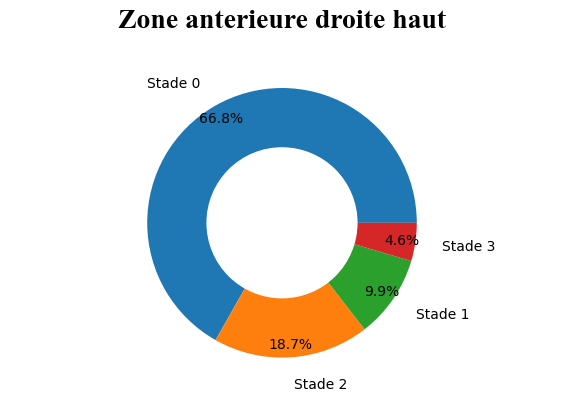

In [63]:
donut_show('Zone anterieure droite haut')

# Lower right anterior area

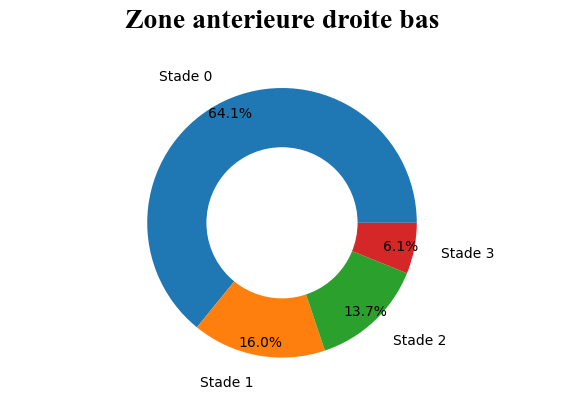

In [31]:
donut_show('Zone anterieure droite bas')

# Upper left anterior area

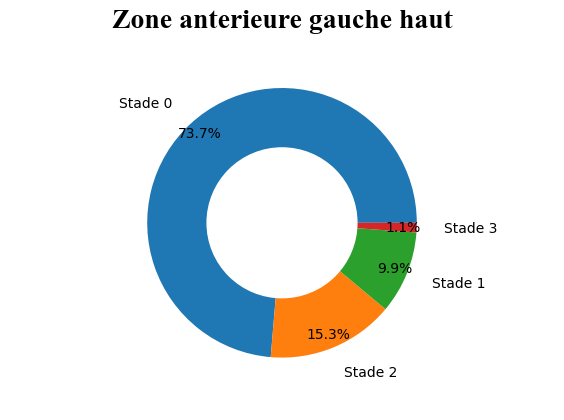

In [32]:
donut_show('Zone anterieure gauche haut')

# Lower left anterior area

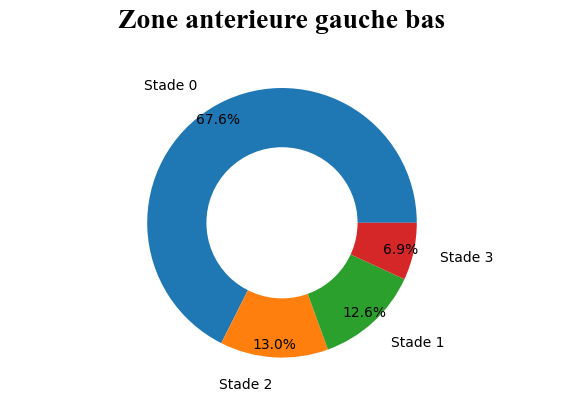

In [33]:
donut_show('Zone anterieure gauche bas')

# Posterior right area top

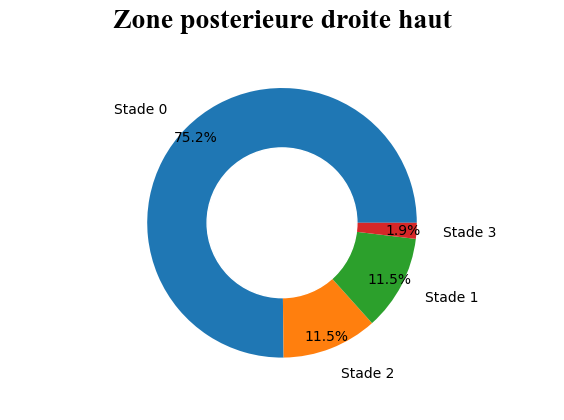

In [34]:
donut_show('Zone posterieure droite haut')

# Lower right posterior area

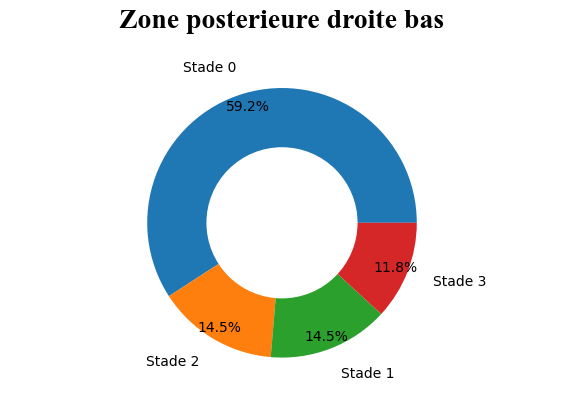

In [35]:
donut_show('Zone posterieure droite bas')

# Left back top area

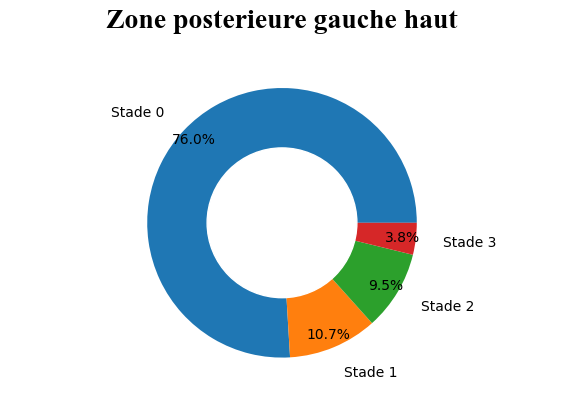

In [36]:
donut_show('Zone posterieure gauche haut')

# Lower left posterior area

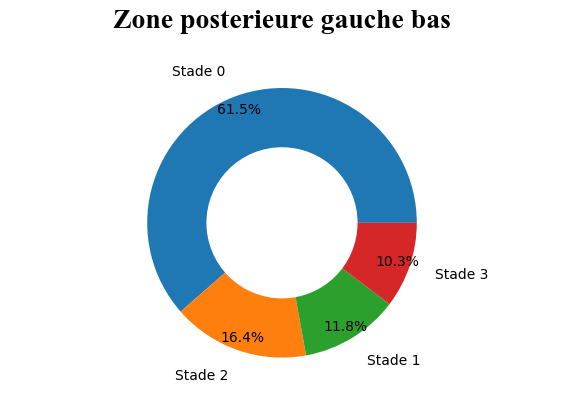

In [37]:
donut_show('Zone posterieure gauche bas')

# Oxygen therapy

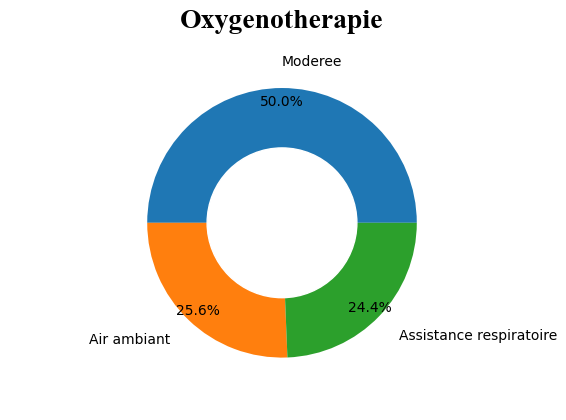

In [38]:
donut_show('Oxygenotherapie')

* **Box plot** :
 - Q1 = first quartile
 - Q3 = third quartile
 - IQR = Q3 - Q1 (Interquartile range)
 - Min = Q1 - 1.5 IQR
 - Max = Q3 + 1.5 IQR
 - outliers are inferior to Q1 or superior to Q3

In [39]:
def boxplot_show(col_name, rates = []):
    """
    Handle numeric data.
    Args:
        col_name(string): The column name to handle
        rates(list of tuples): List of tuples for axes representation composed by:
                                - The name
                                - The value
                                - The color
    """
    data.boxplot(column=[col_name], figsize=(5, 5))
    axes = []
    names = []
    for (name, value, color) in rates:
        axe = plt.axhline(y=value, color=color, linestyle='-')
        axes.append(axe)
        if name != '':
            names.append(name)
    plt.legend(axes, names)
    plt.title(col_name )
    plt.suptitle('')
    plt.show()

We can see that our dataset is unbalanced, it is obvious that we have to avoid biais probleme and use class weight

In [43]:
def bar_show(column_name, x, y, normal_pos):
    barlist = plt.bar(x, y, color ="dodgerblue",  width = 0.4)
    barlist[normal_pos].set_color('g')
    plt.ylabel("Percentage") 
    plt.title(f"State of {column_name}") 
    plt.show()
    plt.close()

# Systolic

In [ ]:
data.Systolique.describe()[['mean', 'min', 'max']]

mean    136.181467
min      88.000000
max     195.000000
Name: Systolique, dtype: float64

On average patients have about 136.18 mmHg, with minimum at 88 mmHg and maximum 195 mmHg

According to Ameli website, the normal rate of systolic must be between 130 and 139, and above you are hypertensive.

In [44]:
rates = {}
rates['Hypotensive'] = round(len(data[data.Systolique < 130]) / len(data)* 100, 2)
rates['Normal Rate'] = round(len(data[(130 <= data.Systolique) & (data.Systolique <= 139)]) / len(data) * 100, 2)
rates['Hypertensive'] = round(len(data[(data.Systolique > 139)]) / len(data)* 100, 2)
rates['No information'] = round(len(data[data.Systolique.isna()]) / len(data) * 100, 2)

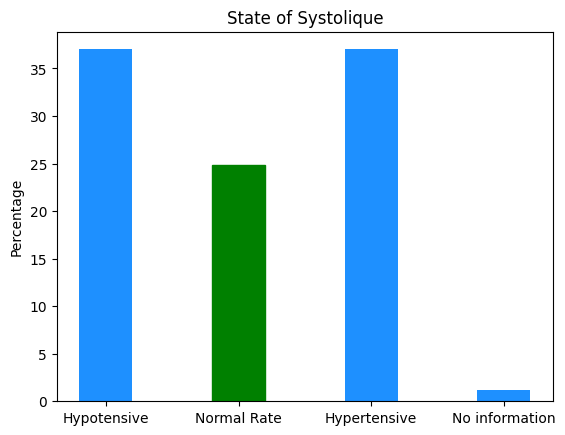

In [45]:
bar_show('Systolique', rates.keys(), rates.values(), normal_pos=1)

Only 24.80% of the patients has a normal systolic, 37.02% has a systolic below 130, 37,02% has a diastolic above and 1.15% with no information.

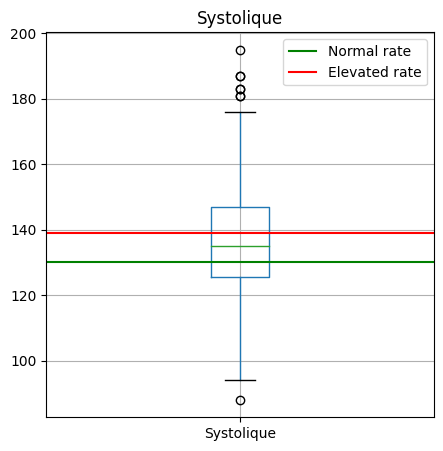

In [46]:
boxplot_show('Systolique', [('Normal rate', 130, 'g'), ('Elevated rate', 139, 'r')])

# Diastolic

In [ ]:
data.Diastolique.describe()[['mean', 'min', 'max']]

mean     80.630769
min      55.000000
max     117.000000
Name: Diastolique, dtype: float64

On average, they have 80.63 mmHg, with minimul at 55 mmHg and maximum at 117 mmHg

According to Ameli website, must be below 90 mmHg 

In [48]:
rates = {}
rates['Normal'] = round(len(data[(data.Diastolique < 90)]) / len(data)* 100, 2) 
rates['Hypertension'] = round(len(data[(data.Diastolique > 90)]) / len(data)* 100, 2) 
rates['No information'] = round(len(data[(data.Diastolique.isna())]) / len(data)* 100, 2) 

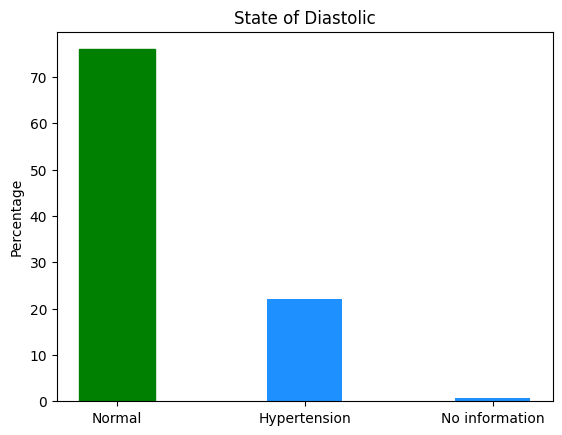

In [49]:
bar_show('Diastolic', rates.keys(), rates.values(), normal_pos=0)

About 75.95% of patients have a normal diastolic rate, with only 0.76 with no information.

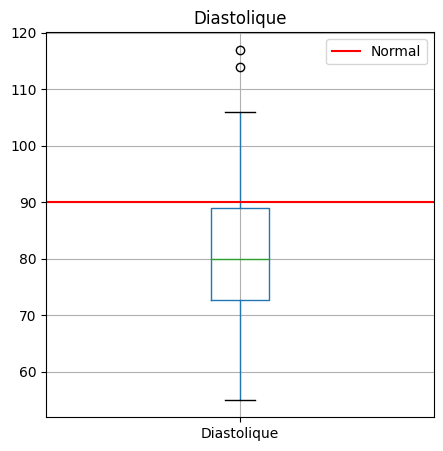

In [50]:
boxplot_show('Diastolique',  [('Normal', 90, 'r')])

# Temperature

The normal human temperature is between 37° and 38°. Below 35° hypethermia and above 38° fever.

Lets see the representation of the patients

In [ ]:
data.Temperature.describe()[['mean', 'min', 'max']]

mean    37.261089
min     35.800000
max     39.600000
Name: Temperature, dtype: float64

On average, 37.26°, minimum 35.80°, maximum 39.6°

In [52]:
rates = {}
rates['Near hypothermia'] = round(len(data[(35 <= data.Temperature) & (data.Temperature < 37)]) / len(data)* 100, 2) 
rates['Normale'] = round(len(data[(37 <= data.Temperature) & (data.Temperature < 38)]) / len(data)* 100, 2) 
rates['Fever'] = round(len(data[(data.Temperature >= 38)]) / len(data)* 100, 2) 
rates['No information'] = round(len(data[(data.Temperature.isna())]) / len(data)* 100, 2) 

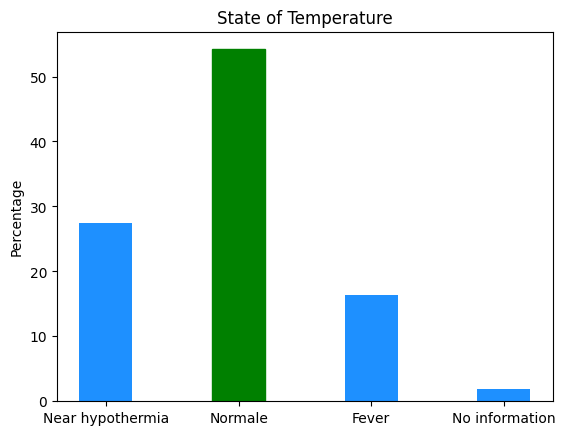

In [53]:
bar_show('Temperature', rates.keys(), rates.values(), normal_pos=1)

54.2% has a normal temperature, 16.41% with ferver, 27.48% near hyperthemia and 1.91% with no information.

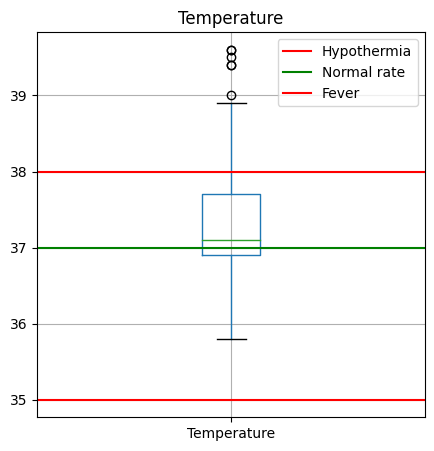

In [54]:
boxplot_show('Temperature', [('Hypothermia', 35, 'r'), ('Normal rate', 37, 'g'), ('Fever', 38, 'r') ])

# Heart rate

In [ ]:
data['Frequence cardiaque'].describe()[['mean', 'min', 'max']]

mean     91.139535
min      25.000000
max     128.000000
Name: Frequence cardiaque, dtype: float64

On average, they have 91.13 rate, minimum at 25 and maximum at 128.

In [56]:
rates = {}
rates['Bradycardia'] = round(len(data[(data['Frequence cardiaque'] < 60)]) / len(data)* 100, 2) 
rates['Normal'] = round(len(data[(60 <= data['Frequence cardiaque']) & (data['Frequence cardiaque'] <= 100)]) / len(data)* 100, 2) 
rates['Tachycardia'] = round(len(data[(data['Frequence cardiaque'] > 100)]) / len(data)* 100, 2) 
rates['No information'] = round(len(data[(data['Frequence cardiaque'].isna())]) / len(data)* 100, 2) 

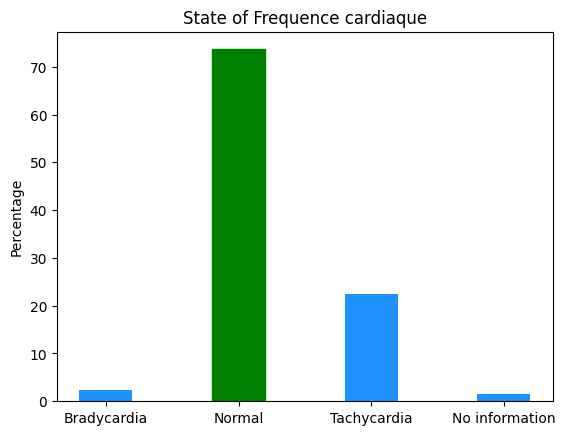

In [57]:
bar_show('Frequence cardiaque', rates.keys(), rates.values(), normal_pos = 1)

Only 2.29% of people have a bradycardia and 22.52 have tachycardia. 73.66% have heart rate between 60 and 100 and 1.53% no information.

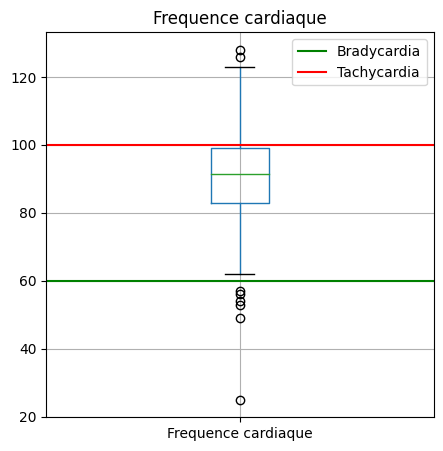

In [58]:
boxplot_show('Frequence cardiaque', [('Bradycardia', 60 , 'g'),('Tachycardia', 100 , 'r')])

# Respiratory rate

In [ ]:
data['Frequence respiratoire'].describe()[['mean', 'min', 'max']]

mean    22.486275
min     13.000000
max     56.000000
Name: Frequence respiratoire, dtype: float64

In [78]:
rates = {}
rates['Normal'] = round(len(data[(13 <= data['Frequence respiratoire']) & (data['Frequence respiratoire'] < 20)]) / len(data)* 100, 2)
rates['Accelerated'] = round(len(data[(data['Frequence respiratoire'] >= 20)]) / len(data)* 100, 2) 
rates['No information'] = round(len(data[data['Frequence respiratoire'].isna()]) / len(data)* 100, 2) 

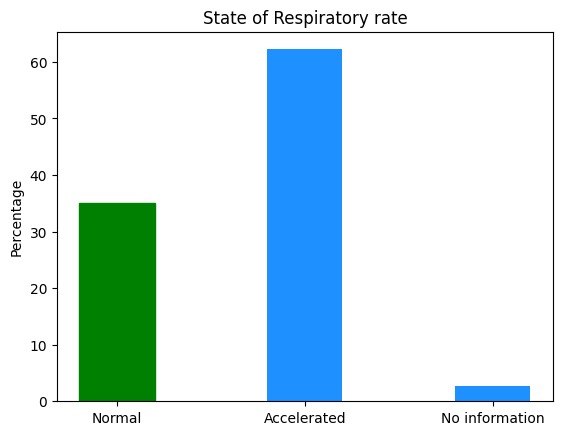

In [79]:
bar_show('Respiratory rate', rates.keys(), rates.values(), normal_pos=0)

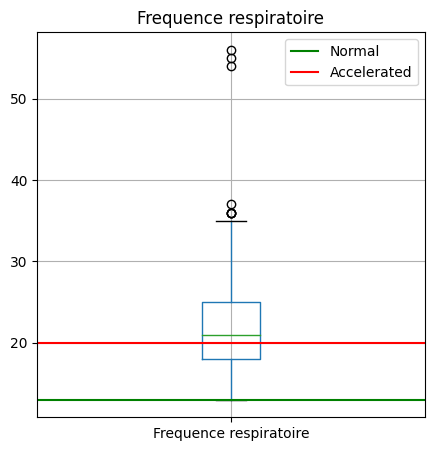

In [83]:
boxplot_show('Frequence respiratoire', [('Normal', 13 , 'g'),('Accelerated', 20 , 'r')])

# Saturation O2

In [81]:
data['Saturation O2'].describe()[['mean', 'min', 'max']]

mean     96.358268
min      79.000000
max     100.000000
Name: Saturation O2, dtype: float64

In [82]:
rates = {}
rates['Desaturation'] = round(len(data[(data['Saturation O2'] < 90)]) / len(data)* 100, 2)
rates['insufficient'] = round(len(data[(90 <= data['Saturation O2']) & (data['Saturation O2'] < 94)]) / len(data)* 100, 2)
rates['Normal'] = round(len(data[(data['Saturation O2'] >= 94)]) / len(data)* 100, 2)
rates['No information'] = round(len(data[data['Saturation O2'].isna()]) / len(data)* 100, 2) 

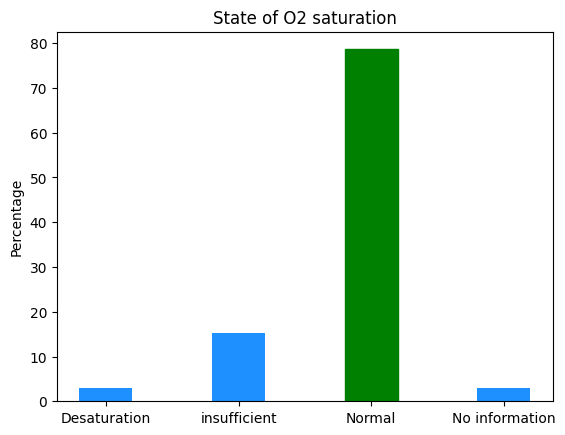

In [85]:
bar_show('O2 saturation', rates.keys(), rates.values(), normal_pos=2)

we have almost 80% of data who have a normal O2 saturation.

In [ ]:
rates['Desaturation'] = round(len(data[(data['Saturation O2'] < 90)]) / len(data)* 100, 2)
rates['insufficient'] = round(len(data[(90 <= data['Saturation O2']) & (data['Saturation O2'] < 94)]) / len(data)* 100, 2)
rates['Normal'] = round(len(data[(data['Saturation O2'] >= 94)]) / len(data)* 100, 2)

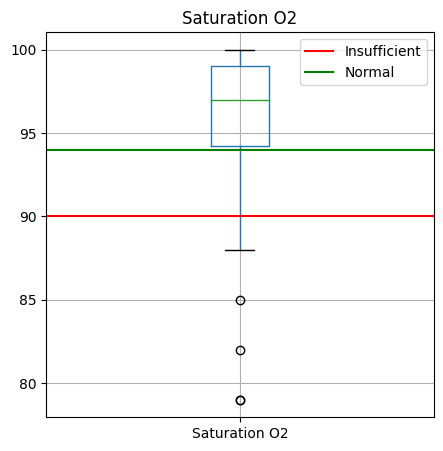

In [88]:
boxplot_show('Saturation O2', [('Insufficient', 90 , 'r'),('Normal', 94 , 'g')])

# Labels visualization

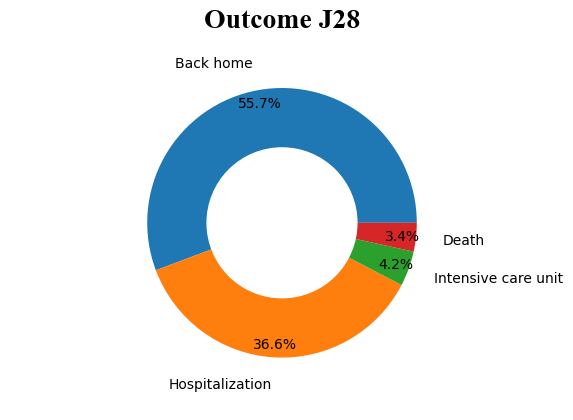

In [89]:
donut_show('Outcome J28')

We can see that our dataset is unbalanced, it is obvious that our model will have bias problem and we have to 